In [121]:
# librerías a usar
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [122]:
#Reference: https://www.gaussianwaves.com/2015/06/how-to-generate-awgn-noise-in-matlaboctave-without-using-in-built-awgn-function/
from numpy import sum,isrealobj,sqrt
from numpy.random import standard_normal

def awgn(s,SNRdB,L=1):
    """
    AWGN channel
    Add AWGN noise to input signal. The function adds AWGN noise vector to signal 's' to generate a resulting signal vector 'r' of specified 
    SNR in dB. It also returns the noise vector 'n' that is added to the signal 's' and the power spectral density N0 of noise added
    Parameters:
        s : input/transmitted signal vector
        SNRdB : desired signal to noise ratio (expressed in dB) for the received signal
        L : oversampling factor (applicable for waveform simulation) default L = 1.
    Returns:
        r : received signal vector (r=s+n)
    """
    gamma = 10**(SNRdB/10) #SNR to linear scale
    if s.ndim==1:# if s is single dimensional vector
        P=L*sum(abs(s)**2)/len(s) #Actual power in the vector
    else: # multi-dimensional signals like MFSK
        P=L*sum(sum(abs(s)**2))/len(s) # if s is a matrix [MxN]
    N0=P/gamma # Find the noise spectral density
    if isrealobj(s):# check if input is real/complex object type
        n = sqrt(N0/2)*standard_normal(s.shape) # computed noise
    else:
        n = sqrt(N0/2)*(standard_normal(s.shape)+1j*standard_normal(s.shape))
    r = s + n # received signal
    return r, n

# Transmisor


In [123]:
#Fs = 100  # 100[Hz] sampling frec [samples/sec]
sample_rate = 1000 #[Hz] samples per second
sampling_period = 1/sample_rate  # [s] time between samples
sps = 8  # [samples/symbol] cantidad de samples por simbolo
N = 600  # [samples] cantidad de samples que tomamos en total
Nsym = int(N/sps)  # [symbols] cantidad de simbolos que tomamos en total

print("Cantidad de samples: ", N, "\nCantidad de simbolos: ", Nsym)

Cantidad de samples:  600 
Cantidad de simbolos:  75


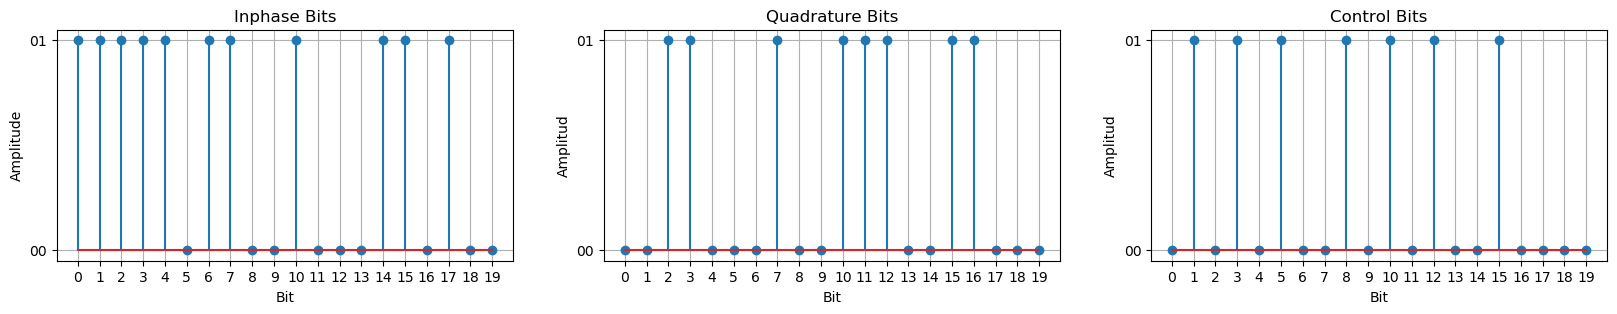

In [124]:
from matplotlib.ticker import StrMethodFormatter

bits = np.random.randint(0, 2, N)  # [0,1] bits aleatorios

i_bits = bits[0::3]  # bits pares
q_bits = bits[1::3]  # bits impares
c_bits = bits[2::3]  # bits de control

fig = plt.figure(figsize=(20, 3))
ax_i = plt.subplot(1,3,1)
ax_i.yaxis.set_major_formatter(StrMethodFormatter("{x:02b}"))
ax_i.yaxis.set_ticks(np.arange(0, 11, 1))
ax_i.xaxis.set_ticks(np.arange(0, len(i_bits), 1))
ax_i.set_title("Inphase Bits")
ax_i.grid(True)
ax_i.set_xlabel("Bit")
ax_i.set_ylabel("Amplitude")
ax_i.stem(i_bits[0:20], use_line_collection=True)

ax_q = plt.subplot(1,3,2)
ax_q.yaxis.set_major_formatter(StrMethodFormatter("{x:02b}"))
ax_q.yaxis.set_ticks(np.arange(0, 11, 1))
ax_q.xaxis.set_ticks(np.arange(0, len(q_bits), 1))
ax_q.set_title("Quadrature Bits")
ax_q.set_xlabel("Bit")
ax_q.set_ylabel("Amplitud")
ax_q.stem(q_bits[0:20], use_line_collection=True)
ax_q.grid(True)

#plt.figure(figsize=(20, 3))
ax_c = plt.subplot(1,3,3)
ax_c.yaxis.set_major_formatter(StrMethodFormatter("{x:02b}"))
ax_c.yaxis.set_ticks(np.arange(0, 11, 1))
ax_c.xaxis.set_ticks(np.arange(0, len(c_bits), 1))
ax_c.set_title("Control Bits")
ax_c.set_xlabel("Bit")
ax_c.set_ylabel("Amplitud")
ax_c.stem(c_bits[0:20], use_line_collection=True)
ax_c.grid(True)
plt.show()

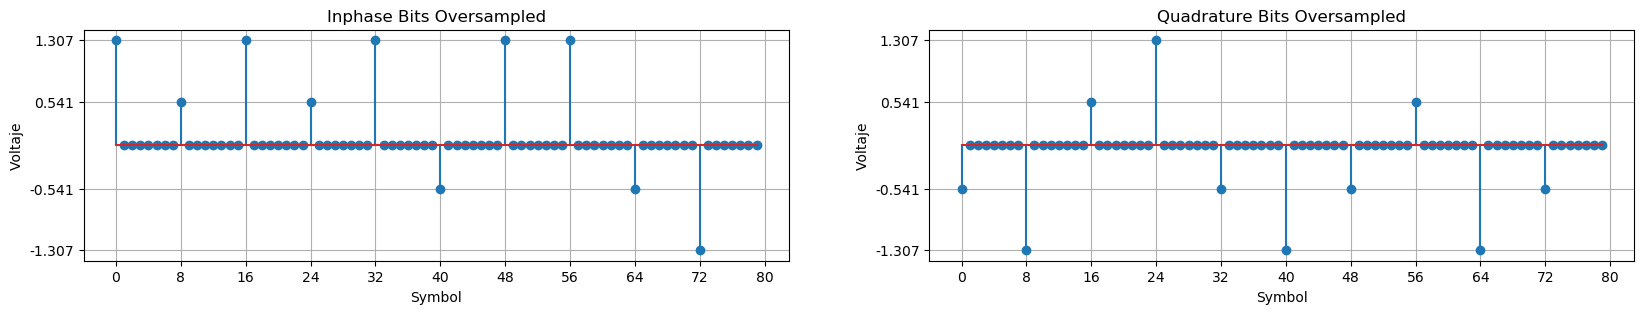

In [125]:
voltage_qc = {}
voltage_qc[(0,0)] = -0.541
voltage_qc[(0,1)] = -1.307
voltage_qc[(1,0)] = 0.541
voltage_qc[(1,1)] = 1.307

voltage_ic = {}
voltage_ic[(0,0)] = -1.307
voltage_ic[(0,1)] = -0.541
voltage_ic[(1,0)] = 1.307
voltage_ic[(1,1)] = 0.541

i_PAM = np.array([])

for index, bit in enumerate(c_bits):
    #print("bits: ", i_bits[index], c_bits[index])
    #print("voltage_ic: ", voltage_ic[(i_bits[index], c_bits[index])])
    pulse = np.zeros(sps)  # "relleno" un array de 8 bits con 0
    pulse[0] = voltage_ic[(i_bits[index], c_bits[index])]  # asigno el valor de la señal
    # concateno el array de 8 bits con el array de bits
    i_PAM = np.concatenate((i_PAM, pulse))

q_PAM = np.array([])
for index, bit in enumerate(q_bits):
    pulse = np.zeros(sps)  # "relleno" un array de 8 bits con 0
    pulse[0] = voltage_qc[(q_bits[index], c_bits[index])]  # asigno el valor de la señal
    # concateno el array de 8 bits con el array de bits
    q_PAM = np.concatenate((q_PAM, pulse))

fig, (ax_i, ax_q) = plt.subplots(1, 2, figsize=(20, 3))
ax_i.yaxis.set_major_formatter(StrMethodFormatter("{x:.03f}"))
ax_i.yaxis.set_ticks([-1.307, -0.541, 0.541, 1.307])
ax_i.xaxis.set_ticks(np.arange(0, len(i_PAM), 8))
ax_i.set_title("Inphase Bits Oversampled")
ax_i.grid(True)
ax_i.set_xlabel("Symbol")
ax_i.set_ylabel("Voltaje")
ax_i.stem(i_PAM[0:80], use_line_collection=True)

ax_q.yaxis.set_major_formatter(StrMethodFormatter("{x:.03f}"))
ax_q.yaxis.set_ticks([-1.307, -0.541, 0.541, 1.307])
ax_q.xaxis.set_ticks(np.arange(0, len(i_PAM), 8))
ax_q.set_title("Quadrature Bits Oversampled")
ax_q.set_xlabel("Symbol")
ax_q.set_ylabel("Voltaje")
ax_q.stem(q_PAM[0:80], use_line_collection=True)
ax_q.grid(True)
plt.show()

# Root Raised-Cosine Filter

Es un filtro pasa bajo muy utilizado para limitar el ancho de banda que nuestra señanl va a ocupar. También tiene la propiedad de valer 0 en intervalos de T. Se implementa en el transmisor y en el receptor.

### Factor de Roll-Off
El parámetro $\beta$ toma valores entre 0 y 1 y determina cuán rapido, en el dominio del tiempo, el filtro decae a 0. Mientras más bajo sea el roll-off, más compacta es nuestra señal en frecuencia.

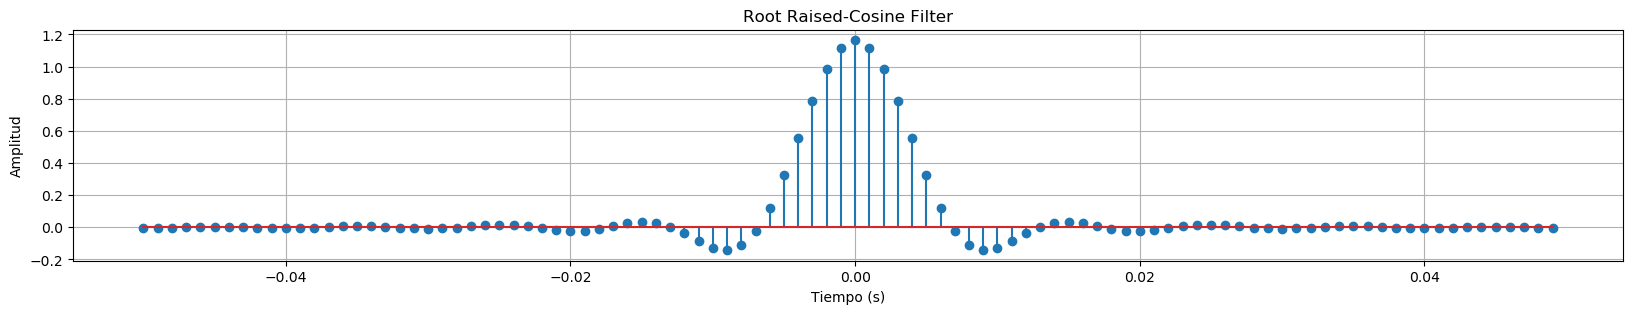

In [126]:
from commpy.filters import rrcosfilter

length = 100
beta = 0.6
Tsym = sps*sampling_period

time, filter_response = rrcosfilter(length, beta, Tsym, sample_rate)
# time:  Array containing the time indices, in seconds, for the impulse response.
# filter_response:  Array containing the impulse response values.

plt.figure(figsize=(20, 3))
plt.stem(time, filter_response, use_line_collection=True)
plt.title("Root Raised-Cosine Filter")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

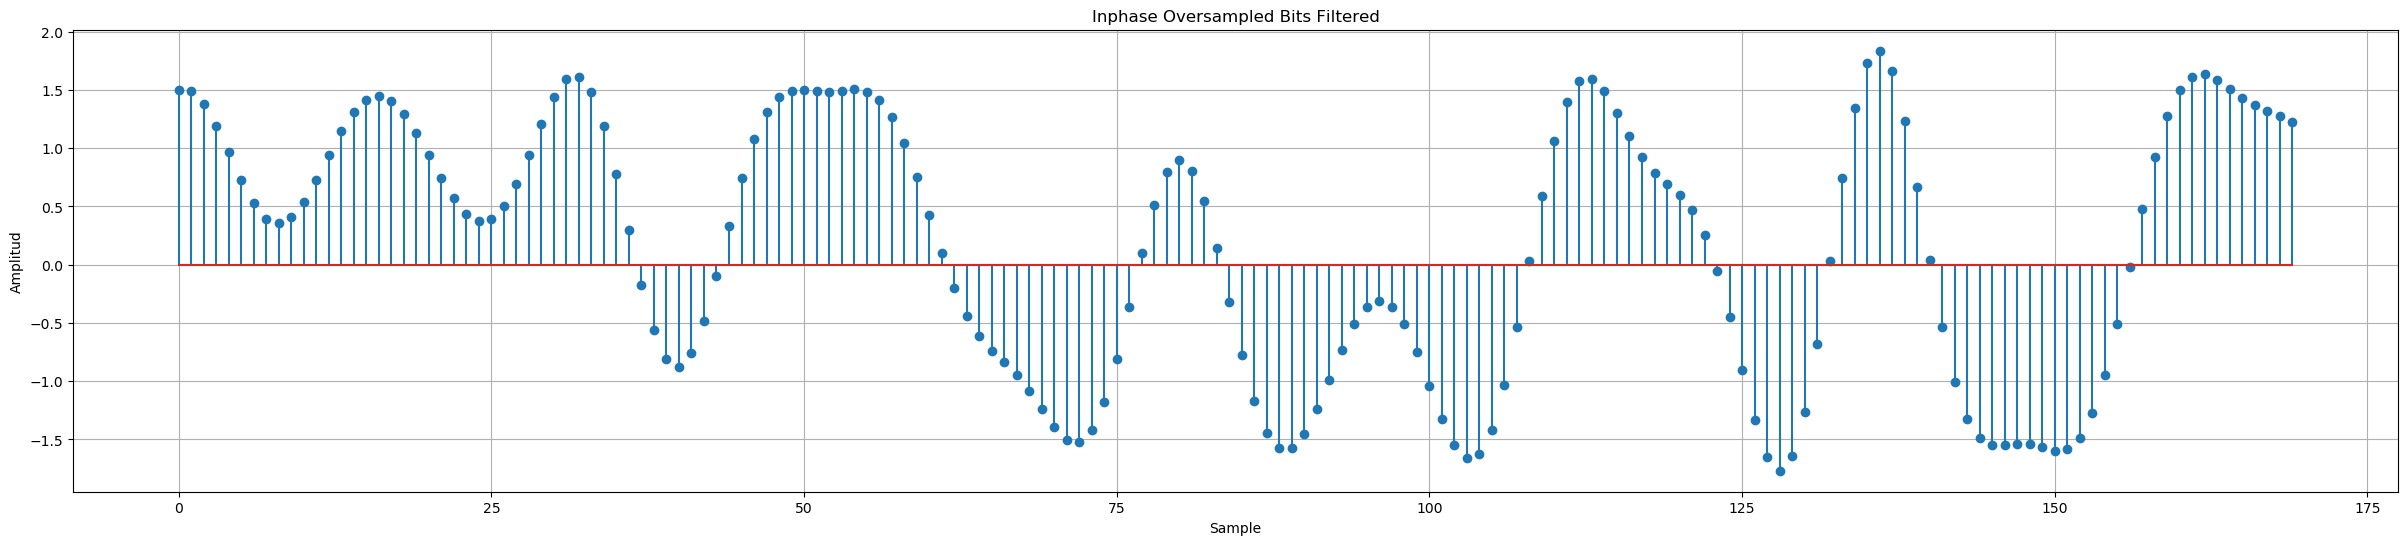

In [127]:
i_filtered = np.convolve(i_PAM, filter_response)
delay = int(length/2)
i_filtered = i_filtered[delay:]  # elimino el comportamiento transitorio

fig, ax = plt.subplots(figsize=(30, 6))
#ax.yaxis.set_major_formatter(StrMethodFormatter("{x:02f}"))
#ax.yaxis.set_ticks(np.arange(i_filtered.min, i_filtered.max))
ax.set_title("Inphase Oversampled Bits Filtered")
ax.grid(True)
ax.set_xlabel("Sample")
ax.set_ylabel("Amplitud")
ax.stem(i_filtered[0:170], use_line_collection=True)
plt.show()

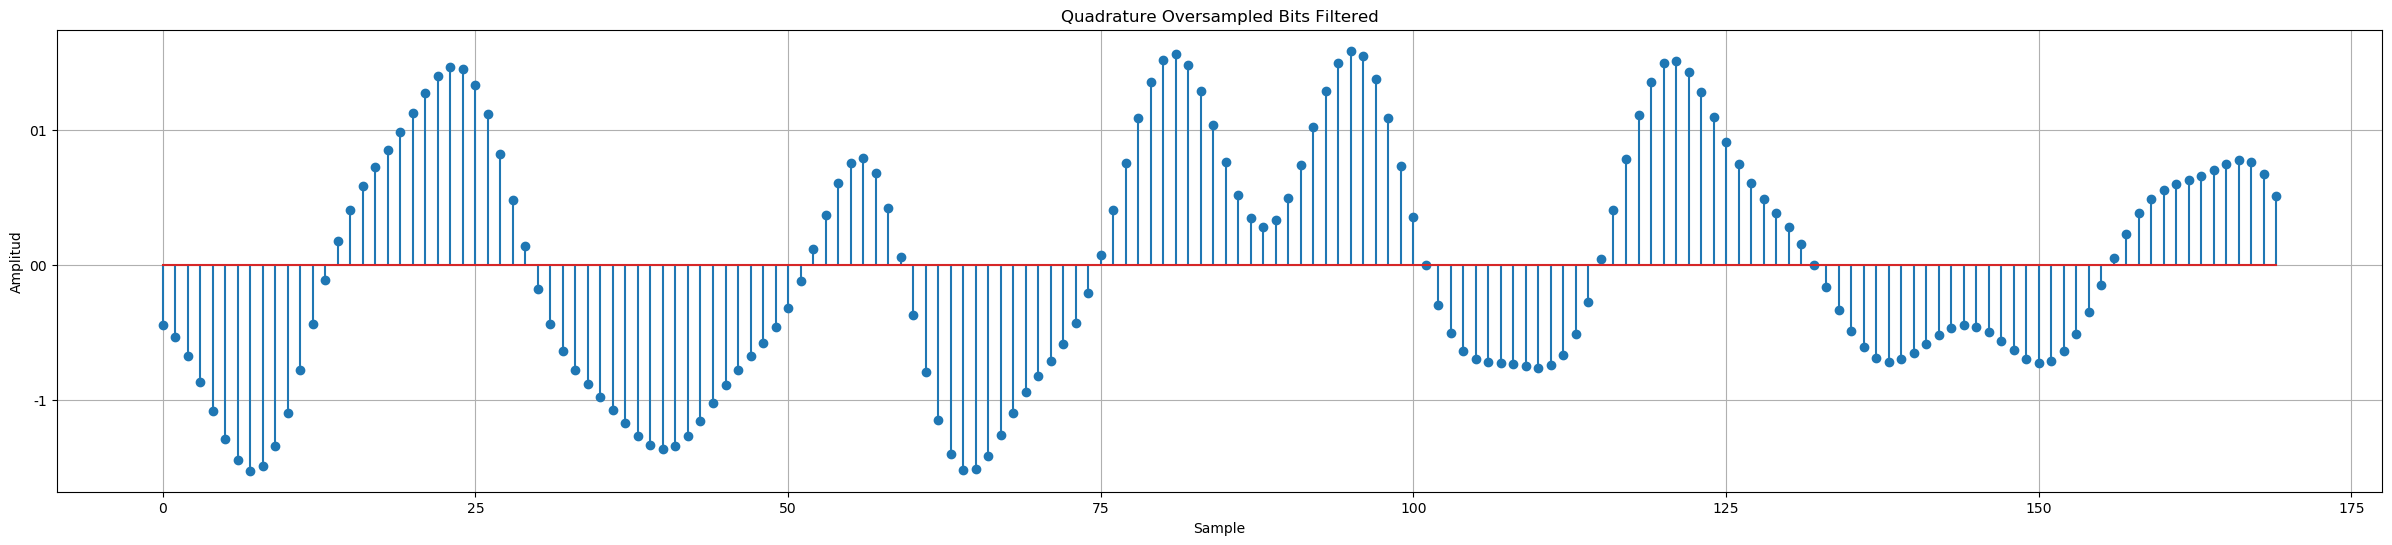

In [128]:
q_filtered = np.convolve(q_PAM, filter_response)
q_filtered = q_filtered[delay:]

fig, ax = plt.subplots(figsize=(30, 6))
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:02b}"))
ax.yaxis.set_ticks(np.arange(-11, 11, 1))
ax.set_title("Quadrature Oversampled Bits Filtered")
ax.grid(True)
ax.set_xlabel("Sample")
ax.set_ylabel("Amplitud")
ax.stem(q_filtered[0:170], use_line_collection=True)
plt.show()

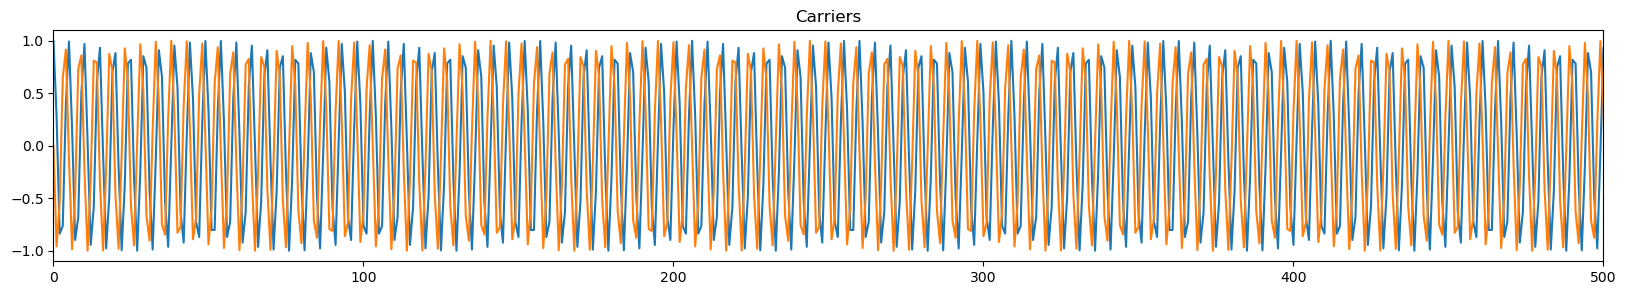

In [137]:
Fc = 1e6  # [Hz] carrier frequency
#t = np.arange(0, len(i_filtered))/len(i_filtered)
t = np.linspace(0, 1, len(i_filtered))
#print("i_filtered size: ", len(i_filtered), "\nt size: ", len(t))

i_carrier = np.cos((2.0*np.pi*Fc*t))
q_carrier = np.sin((2.0*np.pi*Fc*t))
#print("time: ", t)
#print("\ni_Carrier: ", i_carrier)

plt.figure(figsize=(20, 3))
plt.plot(i_carrier)
plt.plot(q_carrier)
plt.xlim(0, 500)
plt.title("Carriers")
plt.show()

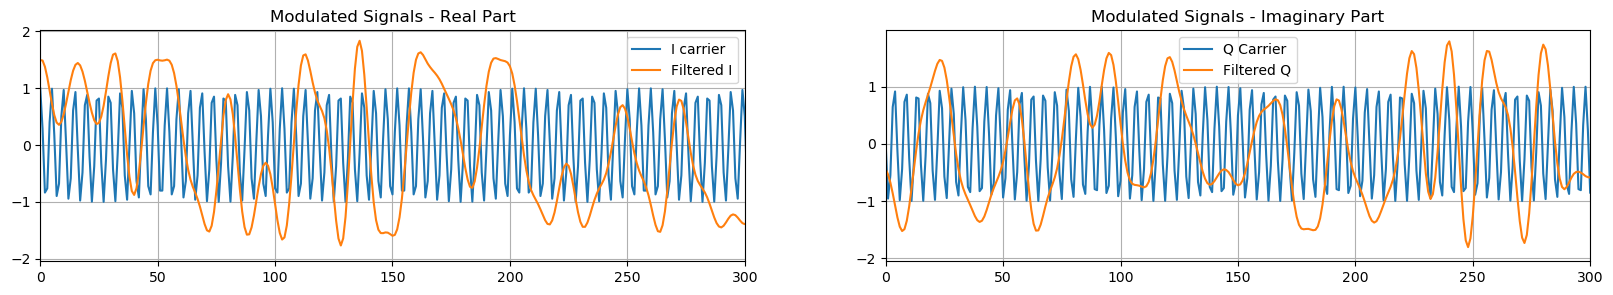

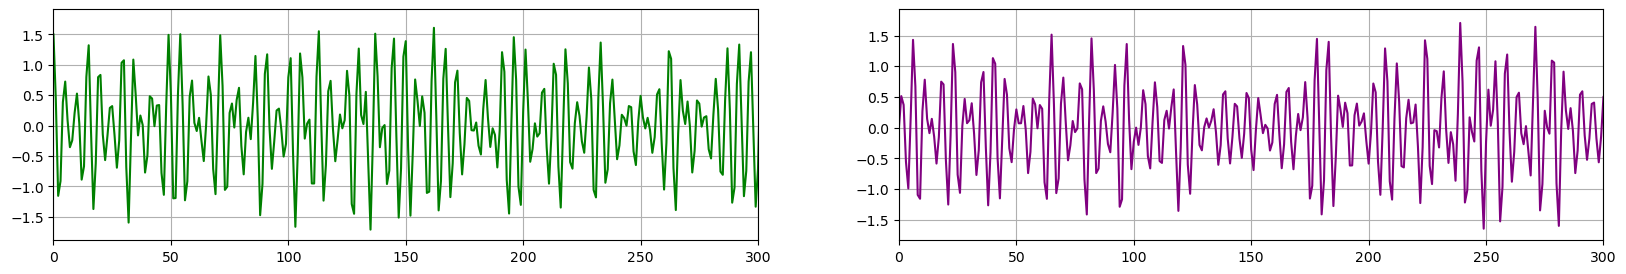

In [138]:
q_modulated = q_filtered * q_carrier
i_modulated = i_filtered * i_carrier

#print("q_filtered size:", len(q_filtered), "q_carrier size:", len(q_carrier))
#print("\n t size:", len(t))

plt.figure(figsize=(20, 3))
plt.subplot(1, 2, 1)
plt.plot(i_carrier, label="I carrier")
plt.plot(i_filtered, label="Filtered I")
plt.xlim(0, 300)
plt.title("Modulated Signals - Real Part")
plt.grid(True)
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(q_carrier, label="Q Carrier")
plt.plot(q_filtered, label="Filtered Q")
plt.xlim(0, 300)
plt.title("Modulated Signals - Imaginary Part")
plt.grid(True)
plt.legend()
plt.figure(figsize=(20, 3))
plt.subplot(1, 2, 1)
plt.plot(i_modulated,color="green", label="Modulated I")
plt.xlim(0, 300)
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(q_modulated, color="purple", label="Modulated Q")
plt.xlim(0, 300)
plt.grid(True)
plt.show()


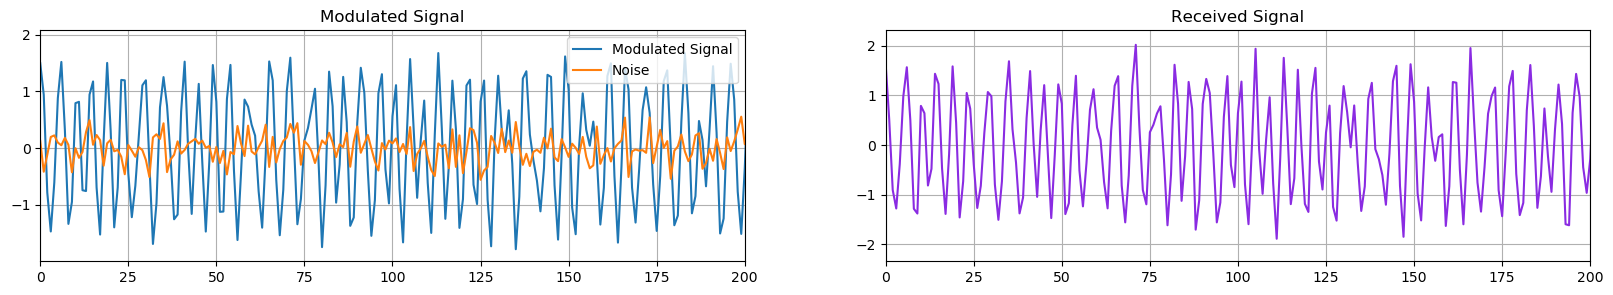

In [157]:
signal_modulated = i_modulated + q_modulated
#noise = np.random.randn(len(signal_modulated))
#noise = np.random.normal(0, 0.4, len(signal_modulated))
#signal_noise = signal_modulated + noise
SNRdb = 10 # [dB] A ratio higher than 1:1 (greater than 0 dB) indicates more signal than noise. 
signal_noise, noise = awgn(signal_modulated, SNRdb, 1)
t = np.arange(len(signal_modulated))

plt.figure(figsize=(20, 3))
plt.subplot(1, 2, 1)
plt.plot(signal_modulated, label="Modulated Signal")
plt.plot(noise, label="Noise")
plt.xlim(0, 200)
plt.title("Modulated Signal")
plt.grid(True)
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(signal_noise, "blueviolet", label="Modulated Signal + Noise")
plt.xlim(0, 200)
plt.title("Received Signal")
plt.grid(True)
plt.show()


# Receptor

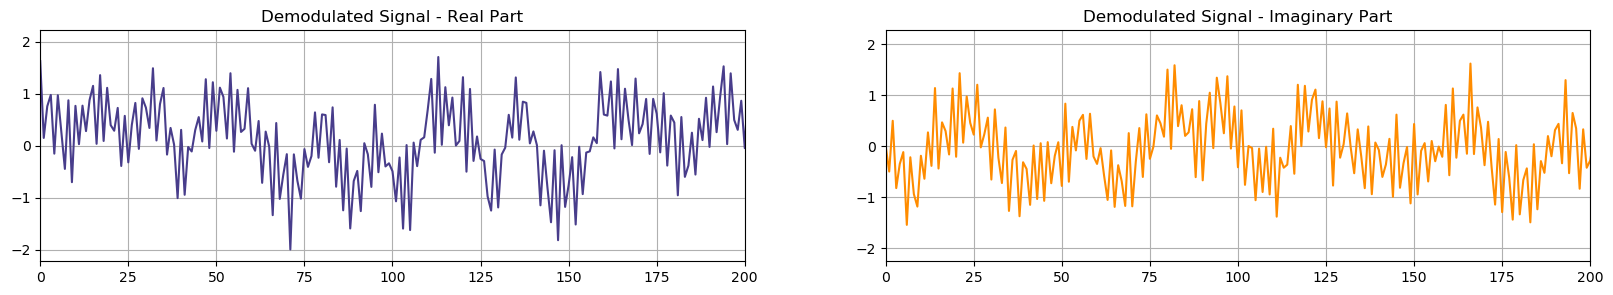

In [158]:
demodulated_i = signal_noise * i_carrier
demodulated_q = signal_noise * q_carrier

plt.figure(figsize=(20, 3))
plt.subplot(1, 2, 1)
plt.plot(demodulated_i, "darkslateblue")
plt.xlim(0, 200)
plt.grid(True)
#plt.ylim(-2, 2)
plt.title("Demodulated Signal - Real Part")
plt.subplot(1, 2, 2)
plt.plot(demodulated_q, "darkorange")
plt.xlim(0, 200)
plt.grid(True)
#plt.ylim(-2, 2)
plt.title("Demodulated Signal - Imaginary Part")
plt.show()


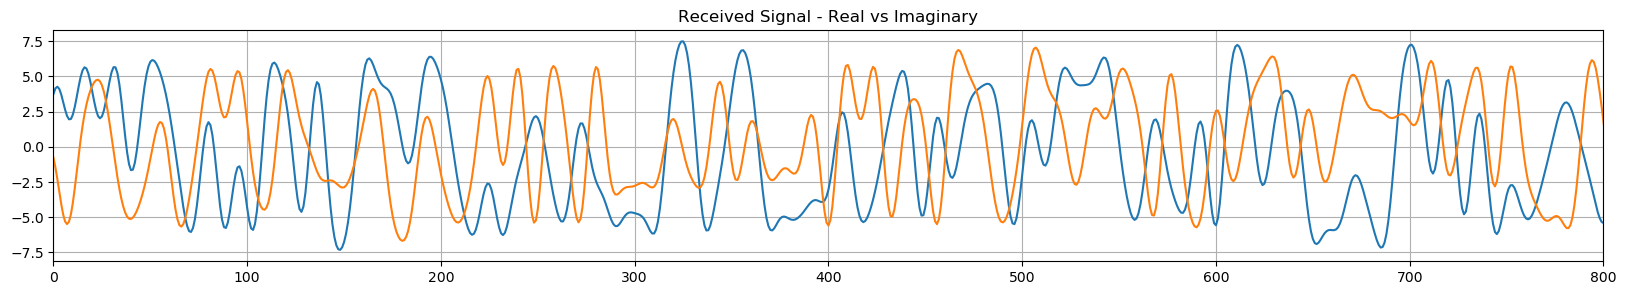

In [159]:
q_filtered_r = np.convolve(demodulated_q, filter_response)
q_filtered_r = q_filtered_r[delay:]
i_filtered_r = np.convolve(demodulated_i, filter_response)
i_filtered_r = i_filtered_r[delay:]
t = np.arange(len(i_filtered_r))

plt.figure(figsize=(20, 3))
plt.plot(t, i_filtered_r, q_filtered_r)
plt.xlim(0, 800)
plt.title("Received Signal - Real vs Imaginary")
plt.grid(True)
plt.show()

# Signal Quality 

### Eye Diagram
Se genera al superponer distintas combinaciones de unos y ceros. Se pueden observar cosas como:
- Periodo del bit: período entre la apertura y cierre del ojo. Se obtiene a partir del cruce de amplitud y el cruce de tiempo.
- Jitter: corresponde básicamente a una desviación de fase respecto de la posición ideal en el tiempo de una señal digital que se propaga en un canal de transmisión
- Cruce de amplitud: se refiere al nivel de voltaje en el cual se produce la apertura del ojo y su posterior cierre.
- Cruce de tiempo: se refiere al tiempo en el que se produce la apertura del ojo y su posterior cierre.

### Constellation
Es un método de representación en el plano complejo de los estados de símbolo en términos de amplitud y fase en los esquemas de modulación digital tales como QAM o PSK. Típicamente, el eje horizontal se refiere a los componentes de los símbolos que están en fase con la señal portadora y el eje vertical a los componentes en cuadratura (90°). Los diagramas de constelación también pueden usarse para reconocer el tipo de interferencia y distorsión en una señal. 


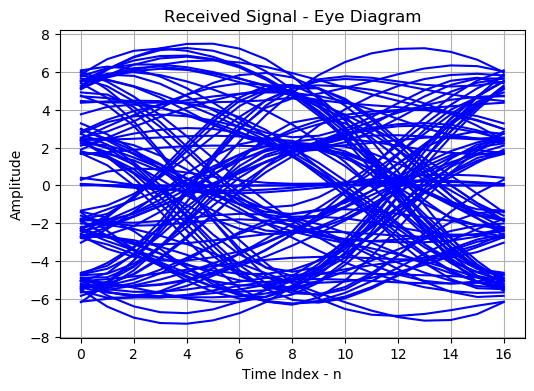

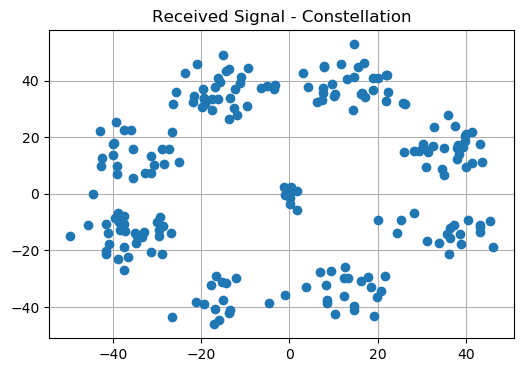

In [160]:
# --------------------- Diagrama de Ojo ---------------------#
from sk_dsp_comm import digitalcom as dc
length_eye = sps*2      # display length in samples (usually two symbols)
start = 0               # start index

dc.eye_plot(i_filtered_r, length_eye, start)
plt.title("Received Signal - Eye Diagram")
#dc.eye_plot(q_filtered_r, length_eye, start)
#plt.title("Diagrama de ojo - Señal Imaginaria")
plt.show()

# ----------------------  Constelación ---------------------#

i_sampled = np.convolve(i_filtered_r, np.ones(sps))
i_sampled = i_sampled[int(sps/2):]
i_sampled = i_sampled[sps::sps]
q_sampled = np.convolve(q_filtered_r, np.ones(sps))
q_sampled = q_sampled[int(sps/2):]
q_sampled = q_sampled[sps::sps]

plt.figure(figsize=(6, 4))
plt.plot(i_sampled, q_sampled, 'o')
plt.title("Received Signal - Constellation")
plt.grid(True)
plt.show()

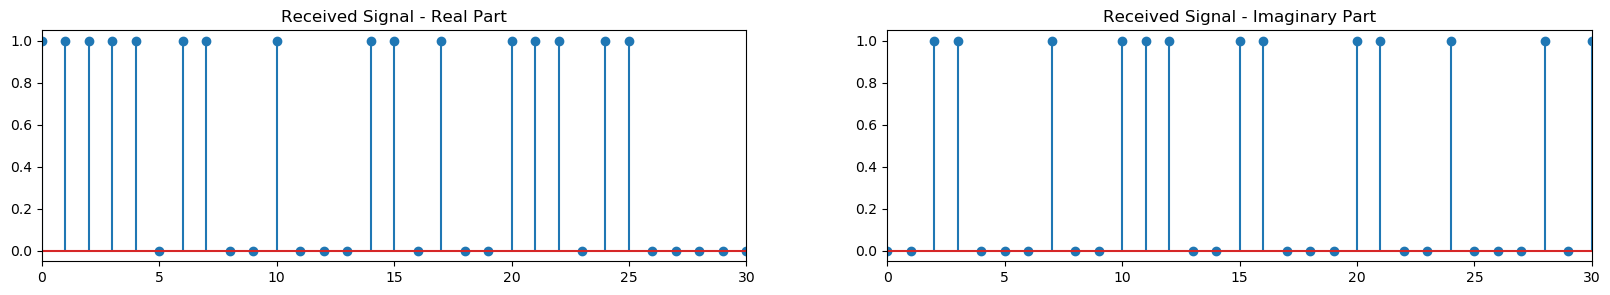

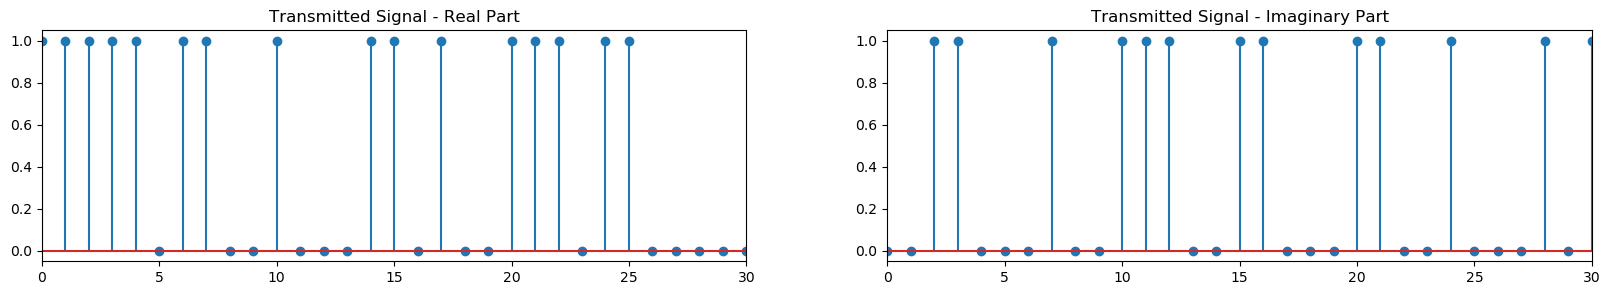

In [161]:
i_estimated = np.array([])
for bit in range(0, len(i_filtered_r), sps):  # range(start, stop, step)
    if i_filtered_r[bit] > 0.5:
        i_estimated = np.concatenate((i_estimated, [1]))
    else:
        i_estimated = np.concatenate((i_estimated, [0]))

q_estimated = np.array([])
for bit in range(0, len(q_filtered_r), sps):  # range(start, stop, step)
    if q_filtered_r[bit] > 0.5:
        q_estimated = np.concatenate((q_estimated, [1]))
    else:
        q_estimated = np.concatenate((q_estimated, [0]))

n = np.arange(len(i_estimated))
#print(q_filtered_r[0:100], q_estimated[0:100])

plt.figure(figsize=(20, 3))
plt.subplot(1, 2, 1)
plt.stem(i_estimated, use_line_collection=True)
plt.xlim(0, 30)
plt.title("Received Signal - Real Part")
plt.subplot(1, 2, 2)
plt.stem(q_estimated, use_line_collection=True)
plt.xlim(0, 30)
plt.title("Received Signal - Imaginary Part")
plt.show()

plt.figure(figsize=(20, 3))
plt.subplot(1, 2, 1)
plt.stem(i_bits, use_line_collection=True)
plt.xlim(0, 30)
plt.title("Transmitted Signal - Real Part")
plt.subplot(1, 2, 2)
plt.stem(q_bits, use_line_collection=True)
plt.xlim(0, 30)
plt.title("Transmitted Signal - Imaginary Part")
plt.show()

In [162]:
q_error = 0
i_error = 0
#print("Bits entrada: ", i_bits, "\nBits estimados: ", i_sampled)
for bit in range(0, len(i_bits)):
    if i_bits[bit] != i_estimated[bit]:
        i_error = i_error + 1

for bit in range(0, len(q_bits)):
    if q_bits[bit] != q_estimated[bit]:
        q_error = q_error + 1

BER = ((i_error + q_error) / (len(i_bits) + len(q_bits)))*100

print("Transmitted bits: ", (len(i_bits) + len(q_bits)),
      "\nError bits: ", i_error + q_error, "\nBER: {:.2f}%".format(BER))

Transmitted bits:  400 
Error bits:  0 
BER: 0.00%


### Referencias
- https://es.wikipedia.org/wiki/Diagrama_de_constelaci%C3%B3n
- https://www.edn.com/eye-diagram-basics-reading-and-applying-eye-diagrams/
- https://pysdr.org/index.html
- https://greenteapress.com/thinkdsp/html/
- https://www.gaussianwaves.com/2015/06/how-to-generate-awgn-noise-in-matlaboctave-without-using-in-built-awgn-function/